# Coursework TensorFlow
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:

- Make sure you use a python environment using the requirements.txt files provided by the course.
- Make sure your notebook executes without errors.
- Do not add and remove cells but rather provide your answers in the spaces given.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.
- Do not import any libraries other than modules from sklearn or TensorFlow.
- Always label your plots.

**Please rename the notebook filename to include your student number in the filename. And please also add your student number below:**

In [1]:
STUDENT_NUMBER = "23210403"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [TensorFlow](https://www.tensorflow.org/)
- [TensorFlow DataSets](https://www.tensorflow.org/datasets)

---

Notes for people running the notebook in Google Colab:

- This notebook uses quite a bit of RAM (the solutions run with ~8.5Gb of RAM), which means that if you are very inefficient in your memory usage, it will not fit within Colab's limits of 12Gb. If this is the case, you can try restarting the runtime to free up memory of variables you have created and that you no longer use or write your code in a more efficient way.
- You can enable a Runtime with GPU acceleration for faster training (Runtime -> Change runtime type)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

2024-03-01 12:23:32.189658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/benny/anaconda3/envs/mlbd/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

# Part 1: Data pre-processing


In these exercises we will look at the classification of flowers into 5 different classes using convolutional neural networks (CNNs). The implementation of this will be done using TensorFlow (TF).

The dataset can be loaded in using the [Tensorflow Datasets](https://www.tensorflow.org/datasets) package. Below you see how we load in the data and change it from a TF generator object into a list of the images and a list of the targets. 

In [4]:
# Load data
data = tfds.load('tf_flowers', split=["train"], as_supervised=True)

2024-03-01 12:23:57.551430: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 100%|██████████| 5/5 [00:11<00:00,  2.39s/ file]

Dataset tf_flowers downloaded and prepared to /Users/benny/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [11]:
images, targets = zip(*[i for i in data[0]])
labels = ["dandelion", "daisy", "tulips",  "sunflowers", "roses"]


print(images[1].shape)

(212, 320, 3)


_Plot the first two images and their classes by writing a function `show_image`. Set the title of the images to be the class (use the actual label, not the number) it belongs to._ 

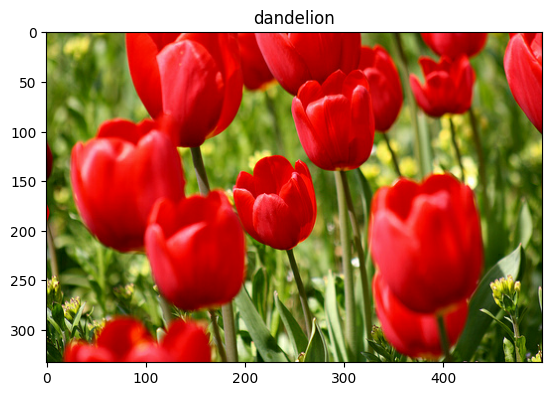

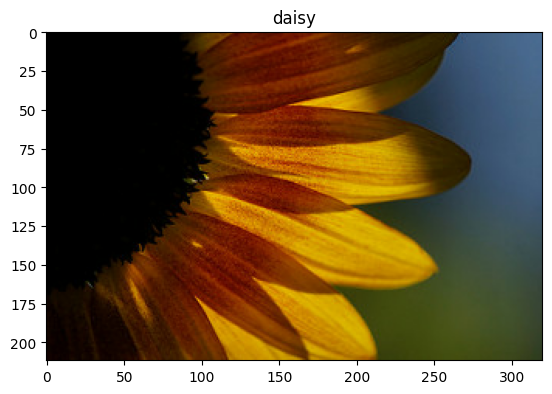

In [13]:
def show_image(image, target):
    # YOUR CODE HERE
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i], fontsize=12)

for i in range(2):
    show_image(images[i], targets[i])

Before we can use the data to train neural networks, we need to pre-process the data such that:
    
- the images are all the same shape (224,224)
- the images, originally with values (0, 255), are mapped to have values between (0, 1)
- the labels are represented as one-hot vectors

_Write a function to rescale and resize the images._

In [ ]:
def rescale_and_resize(image):
    # YOUR CODE HERE
    raise NotImplementedError()
    return preprocessed_image

show_image(rescale_and_resize(images[0]), targets[0])

In [ ]:
check_var_defined('rescale_and_resize')

_Now use the function to pre-process the data in the variable `images` and save the preprocessed images in an np.ndarray `images_preprocessed`._

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('images_preprocessed')
assert type(images_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

One approach to represent the image labels so that they can be trainable by a neural network is to represented them as a one-hot vector. 

_Write a function `one_hot_encoding` that takes the integer label and returns a one-hot vector of the label._

In [ ]:
def one_hot_encoding(target):
    # YOUR CODE HERE
    raise NotImplementedError()

print(f"target: {targets[0]}, encoding: {one_hot_encoding(targets[0])}")

_Now use the function `one_hot_encoding` to create an np.ndarray of the one-hot representations of all the labels in `targets` and save them in `targets_preprocessed`._

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('targets_preprocessed')
assert type(targets_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

In this notebook you will train different models and compare them against each other. 

Now that the data is pre-processed. We will split the data in three datasets, a train, validation and test set. 

_Why do we need these three sets and what do we use them for._

YOUR ANSWER HERE

_Now split the data such that we have a train set with 80\% of the samples and a validation and test set each with 10\% of the samples. Save the results in `x_train`, `y_train`, `x_val`, `y_val`, `x_test`, and `y_test`._

In [ ]:
tf.keras.utils.set_random_seed(371947)
# YOUR CODE HERE
raise NotImplementedError()

print(f"Train samples: {len(x_train)}, Validation samples: {len(x_test)}, Test samples: {len(x_val)}")

In [ ]:
check_var_defined('x_train')
check_var_defined('y_train')

check_var_defined('x_val')
check_var_defined('y_val')

check_var_defined('x_test')
check_var_defined('y_test')

WARNING: Before we continue we delete the variable `images_preprocessed` (you don't need that anymore) to manage our RAM consumption. If you want to use that variable again you will have to rerun the cell that creates it.

In [ ]:
# Freeing up RAM by deleting this variable
del images_preprocessed

# Part 2: Training a basic CNN model 

Now that we have pre-processed the data and split it into different parts for training, validation and testing, you can start training some neural networks. 

Our model will take as input the $224 \times 224$ rgb (3-channel) images and will give as output a length five vector of which the different elements correspond to the five different classes. 

The model will start with convolutional layers followed by a hidden dense layer and then the final dense layer that gives us our output. 

_What kind of activation function should we use on the convolutional, dense and output layers and why these specific activation functions? (motivate your answers)_

YOUR ANSWER HERE

_Create a model using the `tf.keras.models.Sequential()` model and add to that:_

- Input layer: A 2D convolutional layer with 8 filters, a 3x3 kernel and the ReLU activation function. Specify that this layer has an `input_shape` of (224, 224, 3)_ 
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 16 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A Flatten layer to flatten the filters to a single vector
- A Dense layer with 32 nodes and your chosen activation

- Output layer: A Dense layer with 5 nodes and your chosen activation

_Store the model in the variable `model_basic`._

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(93612)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('model_basic')
model_basic.summary()

To compile the model we need to specify a loss function. 

_What loss function would be appropriate for this multi-class classfication problem?_

_Also, during training we would like to monitor how well our model performs on predicting the targets. What would be a good metric to track? Motivate your answers._ 

YOUR ANSWER HERE

Now compile the model using the `Adam` optimiser, your chosen loss, and your chosen metric to track. (Tip: TF has some loss function and metrics implemented in [tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('model_basic')

_Now fit the train data for 10 epochs and save the training history in the variable `history_basic`. Also specify the `validation_data` and a `batch_size` of 32._

In [ ]:
tf.keras.utils.set_random_seed(47290)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('history_basic')

_Now to see how the model performs, write a function `plot_metrics` that plots the loss for the train and validation set. In the same function also create a separate plot that plots the other metric for the train and validation set._

In [ ]:
def plot_metrics(history):
    # YOUR CODE HERE
    raise NotImplementedError()
    
plot_metrics(history_basic)

_Comment on the performance of the model based the tracked loss and metric_

YOUR ANSWER HERE

*What happens if we were to train the model for more epochs? What will happen to the performance of the model?*

YOUR ANSWER HERE

*Write a function `model_predict` that takes the model and some image data and returns the predicted targets (as integers corresponding to the predicted labels).* 

In [ ]:
def model_predict(model, x):
    # YOUR CODE HERE
    raise NotImplementedError()
    return predicted_targets

_Gather the targets of the test set (scalar integer value corresponding to the labels) and save them in `test_targets`._

_Compute the targets for `model_basic` and store them in the variable `test_targets_basic`._

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('test_targets')
check_var_defined('test_targets_basic')

assert test_targets.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"
assert test_targets_basic.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"

_Calculate the precision and recall averaged over the 5 classes. (Precision and recall for each classes and then avaraged in one score)_

In [ ]:
def average_recall_precision(y, y_predict):
    # YOUR CODE HERE
    raise NotImplementedError()

    print(f"Average Recall: {recall:.3f}, Average Precision {precision:0.3f}")
    return recall, precision

recall_basic, precision_basic = average_recall_precision(test_targets, test_targets_basic)

In [ ]:
check_var_defined('recall_basic')
check_var_defined('precision_basic')

_Show the predicted targets in a confusion matrix. Show the predicted labels in percentages (percentage of the samples from true class labeled as predicted class) and add the labels to the axes._

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y, y_pred, title=""):
    # YOUR CODE HERE
    raise NotImplementedError()
    plt.title(title)
    plt.show()

plot_confusion_matrix(test_targets, test_targets_basic, "basic model")

_Comment on the recall and precision of the model, as well as the predictions in the confusion matrix._

YOUR ANSWER HERE

# Part 3: Improving the model

To improve on the model we will include some Dropout layers. 

_What do dropout layers do and why might this increase the performance of our models?_

YOUR ANSWER HERE

Another method to improve the model is by using a technique called data augmentation. 

_Explain the concept data augmentation and explain how it might increase the performance of our model._

YOUR ANSWER HERE

_Use the exact same model as for the `model_basic`, but play around with adding in a data augmentation layer (e.g. [tf.keras.layers.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) ) and adding in dropout layers (dropout is typically only added in the dense part of the network). Store the new model in the variable `model_dropout` and compile it using the same metrics and loss as before._

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(48263)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('model_dropout')
model_dropout.summary()

_Fit the new model in the same way as before and save the history in `history_dropout`. However, train for 20 epochs instead of 10._

In [ ]:
tf.keras.utils.set_random_seed(103745)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('history_dropout')

In [ ]:
plot_metrics(history_dropout)

_Comment on the performance of the improved model based on the loss and metrics during training._

YOUR ANSWER HERE

_Why did we have to train the model for more epochs than the basic model?_

YOUR ANSWER HERE

Now we evaluate our model on the test set using the functions you wrote before

In [ ]:
test_targets_dropout = model_predict(model_dropout, x_test)
recall_dropout, precision_dropout = average_recall_precision(test_targets, test_targets_dropout)    
plot_confusion_matrix(test_targets, test_targets_dropout, "Dropout model")

In [ ]:
check_var_defined('test_targets_dropout')
check_var_defined('recall_dropout')

In [ ]:
check_var_defined('test_targets_dropout')
check_var_defined('precision_dropout')

_Comment on the precision and recall of the model as well as the predictions in the confusion matrix_

YOUR ANSWER HERE

# Part 4: Transfer learning

In order to improve our model even further, we will make use of transfer learning. 

_Explain in your own words what tranfer learning means and why it would help in our particular case._

YOUR ANSWER HERE

Below you can see how we load in a pre-trained MobileNet that is trained on the ImageNet datastet. By not including the top part of the network we get only the convolutional layers and can add our own dense layers after that. We set all the layers of the MobileNet as not trainable, since this would be computationally expensive to do and we also want to avoid overfitting. Instead we will only be training the dense part. 

In [ ]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False, 
    weights='imagenet'
)

for layer in mobilenet.layers:
   layer.trainable = False

print("Output shape of the MobileNet: ", mobilenet.output_shape)

_Use a sequential model and add the MobileNet, followed by a MaxPool2D layer, and then the dense part of the network which you can use the same as we have used in the previous models. Store the model in the variable `model_mobilenet`. Compile the model using the same metrics, loss and optimiser as before._

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(387453)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('model_mobilenet')
model_mobilenet.summary()

*Train the model in the same way as before, for 10 epochs.*

In [ ]:
tf.keras.utils.set_random_seed(9673)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
check_var_defined('history_mobilenet')

In [ ]:
plot_metrics(history_mobilenet)

In [ ]:
test_targets_mobilenet = model_predict(model_mobilenet, x_test)
recall_mobilenet, precision_mobilenet = average_recall_precision(test_targets, test_targets_mobilenet)    
plot_confusion_matrix(test_targets, test_targets_mobilenet, "Mobilenet model")

In [ ]:
check_var_defined('test_targets_mobilenet')
check_var_defined('recall_mobilenet')


In [ ]:
check_var_defined('precision_mobilenet')


_Comment on the results from the transfer-learned model and why the results differ to the case considered previously without transfer learning._

YOUR ANSWER HERE

_Suggest some ways the model could be improved further._

YOUR ANSWER HERE